<img src="logo-2020.png" alt="frankfurt school hmi" width="160"/>


# Problem Set 5: K-means Clustering  (14 points total)

## Instructions

Problem set 5 consists of one notebook:

    ps5_nb1.ipynb
 

### Instructor

- Prof. Dr. Gregory Wheeler (`g.wheeler@fs.de`)


---

### Declare your collaborators
You may work alone or in a group. The maximum group size is 4 people total. 

If you work in a group, use the next cell to enter the list of names (first, last) of your collaborators.  Do not include yourself.

~~~python
# Example
COLLABORATORS = ['Stu Dent', 'May Bee', 'Ki Val Storr']
~~~
You should also familiarize yourself with the collaboration policy on the course Canvas page.

In [1]:
# Be sure your names are strings
COLLABORATORS = ['Jiarong Zhou','Sishan Yang','Hang Yang']

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from pylab import rcParams

# set the size of the plot
rcParams['figure.figsize'] = 11, 8 
# set font sizes of plots
plt.rcParams['font.size'] = 13
plt.rcParams['axes.labelsize'] = 14

In [3]:
from numpy.random import seed
seed(53)


To complete this assignment you will need to perform mathematical operations along axes of an array.  The next two questions are designed to ensure that you are familiar with the numpy conventions for doing this. 


# 0. Numpy sum axis

Numpy arrays allow for an optional argument, called `axis`, which specifies the axis (or axes) along which a sum is performed. Getting the hang of this will be important to implement the K-means algorithm.  You might find this short article on numpy [axes](https://medium.com/@aerinykim/numpy-sum-axis-intuition-6eb94926a5d1) helpful.  Or simply start by experimenting with the following lines of code and compare the three different outputs.

~~~python
# Check your intuitions about axis with 
# the following simple array, A:
#
A = np.array([[0, 2], [1, 3]])

# compare the following operations
np.sum(A, axis = 0)
np.sum(A, axis = 1)
np.sum(A)
~~~

The axis parameter can be used with other numpy array operations, too, as you will soon see.

In [4]:
# UNGRADED
# Check your intuitions about axis with 
# the following simple array, A:

A = np.array([[0, 2], [1, 3]])
np.sum(A, axis = 0)

#np.sum(A, axis = 1) #refer to the row sum, sum of each instances
#np.sum(A)
np.diff(A)

array([[2],
       [2]])

<div class="alert alert-block alert-warning">
<b>Warning:</b> You should remove all print statements you introduce before submitting your assignment, as their inclusion may interfere with grading.  
</div>

## Quiz on the NumPy axis parameter

## Question 1.
Suppose that you have two training examples, $\{x^{(1)}, x^{(2)}\}$, and you wish to compute the squared difference between their respective feature values.  Both training examples have three features, i.e., $x^{(i)} \in \mathbb{R}^3$ (for $i = 1, 2)$. Suppose this $m = 2$ data set is stored in `A`, a 2 x 3 array.    

To perform this calculation, what operation or operations could you use?  Select all and only those that apply.

- A) `np.diff(A**2, axis = 1)`
- B) `np.diff(A**2, axis = 0)`
- C) `np.diff(A, axis = 1)**2`
- D) `np.diff(A, axis = 0)**2`
- E) `np.diff(A)**2`

### Q1 Answer:

In [4]:
def ans_one():
    """ Returns a list of your answers.  
    
    Parameters
    ----------
    :ans:  list
        The list of your answers. Elements of :ans: are strings.
    Returns
    -------
    :ans:
    """
    
    # YOUR CODE HERE
    ans = ['D']
    #raise NotImplementedError()
    return ans

In [5]:
# Test cell to check the format of your answer
ans = ans_one()
%run -i 'ans_format_test.py'

## Question 2.
Suppose you wish to compute the squared difference in the day-to-day closing prices of two stocks, $\{x^{(1)}, x^{(2)}\}$, over 3 trading days.  Thus, both training examples have 3 features, i.e., $x^{(i)} \in \mathbb{R}^3$ (for $i = 1, 2)$. To be clear, you are interested in the squared difference in the two periods between the three days of closing prices for each stock.  Suppose this $m = 2$ data set is stored in `A`, a 2 x 3 array.    

To perform this calculation, what operation or operations could you use?  Select all and only those that apply.

- A) `np.diff(A**2, axis = 1)`
- B) `np.diff(A**2, axis = 0)`
- C) `np.diff(A, axis = 1)**2`
- D) `np.diff(A, axis = 0)**2`
- E) `np.diff(A)**2`

### Q2 Answer:

In [8]:
def ans_two():
    """ Returns a list of your answers.  
    
    Parameters
    ----------
    :ans:  list
        The list of your answers. Elements of :ans: are strings.
    Returns
    -------
    :ans:
    """
    ans = ['C','E']
    # YOUR CODE HERE
    #raise NotImplementedError()
    return ans

In [9]:
# Test cell to check the format of your answer
ans = ans_two()
%run -i 'ans_format_test.py'

# I. A Risk Assessment Task

## Dulle and Boring

You have just returned from an asset management conference where you learned about two new (fictitious) metrics for measuring risk:  the <b>Dulle ratio</b>, $\delta_{r}$, which takes values between -15 and 15, and the <b>Boring coefficient</b>, $\beta_{c}$, which takes values between -5 and 5. The problem with the Dulle ratio is that it does not work well as an indicator when markets are declining, whereas the Boring coefficient runs into difficulties in low-volitility markets. 

Something the instructor said at the conference stuck with you.  Even though the precise relationship between Dulle and Boring is not known, she said that the two often complement one another, and that together they can sometimes identify asset classes that have a remarkably similar risk-to-reward profile that is robust across a variety of standard technical indicators.

Intrigued, you wish to evaluate all of your holdings according to Dulle and Boring to see if some candidate classes  emerge.  To do this, you will implement a <b>K-means classifier</b> to cluster your assets by their Dulle ratios ($x_1$) and Boring coefficients ($x_2$).

---
## Load and visualize your data

To begin, you will need to load your data set. Recall how to load a `.csv` file from earlier exercises as an np.array. 

Below is the function `def loadAndPlot(csv_file)` you will finish to complete this task.  In the following template, you will see three lines that you need to add.

~~~python
def loadAndPlot(csv_file):
    """A function that takes one argument, csv_file, and 
       produces a scatter plot.
    
    INPUT
    :csv_file:  a comma separated values (csv) file
        the data set you wish to load and plot for the assignment
    
    RETURN
    :data:  numpy.ndarray
        the variable data stores the values of csv_file as an np array 
    :yourplot:  matplotlib.collections.PathCollection
        the matplotlib scatter plot of data
    """
   
    # load data as np array
    data = --

    # plot
    rcParams['figure.figsize'] = 11, 8 
    plt.ylabel(r'$x_2$: Boring coefficient $(\beta_{c})$')
    plt.xlabel(--)
    yourplot = --
    return data, yourplot

~~~


Your plot should look like this:

<img src="ps5-fig01.png" alt="ps5_fig01.png" width="600"/>

To match the transparancy of the plotted data points, use `alpha=.6`.

In [10]:

def loadAndPlot(csv_file):
    """A function that takes one argument, csv_file, and 
       produces a scatter plot.
    
    INPUT
    :csv_file:  a comma separated values (csv) file
        the data set you wish to load and plot for the assignment
    
    RETURN
    :data:  numpy.ndarray
        the variable data stores the values of csv_file as an np array 
    :yourplot:  matplotlib.collections.PathCollection
        the matplotlib scatter plot of data
    """
    
    # YOUR CODE HERE
    # load data as np array
    data = np.genfromtxt(csv_file, delimiter=',')

    # plot
    rcParams['figure.figsize'] = 11, 8 
    plt.ylabel(r'$x_2$: Boring coefficient $(\beta_{c})$')
    plt.xlabel(r'$x_1$: Dulle ratio $(\delta{r})$')
    yourplot = plt.scatter(data[:,0],data[:,-1],alpha=0.5)
    #raise NotImplementedError()
    return data, yourplot


In [11]:
data = np.genfromtxt('ps5.csv', delimiter=',')
data[:,0].shape

(843,)

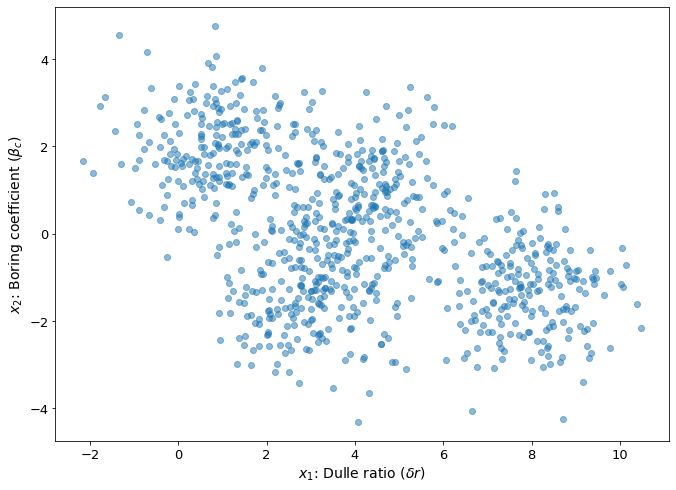

In [12]:
#test cell
data, yourPlot = loadAndPlot('ps5.csv')
yourPlot

In [13]:
# test cell

if isinstance(data, np.ndarray):
    assert True
else:
    raise AssertionError("Wrong datatype: Your data should be stored as an np array")


# II. The K-means Algorithm

The <b>K-means algorithm</b> is an <b>unsupervised learning</b> algorithm which  clusters similar <i>unlabeled</i> training examples.  To be more specific, you are given a training set $\{x^{(1)}, x^{(2)}, \ldots, x^{(m)}\}$ of training examples, where each $x^{(i)}$ is an $n$-dimensional feature vector.  The goal of K-means is to categorize the data into a few cohesive clusters.  In our Dulle and Boring example, there are two features, the Dulle ratio and the Boring coefficient; so, each $x^{(i)} \in \mathbb{R}^2$.  Intuitively, we would like to assign each $x^{(i)}$ into one of 3 clusters. So, we specify $K = 3$ for the Dulle and Boring example.

For Dulle and Boring, it is relatively straightforward which data points will be assigned to the three clusters from observing the plot.  Nevertheless, the point of starting with this example and its obvious outcome is to gain an intuitive understanding of how the K-means algorithm works to find these three clusters.  

The basic idea behind K-means is that the algorithm starts with a guess at where the "center" of each of the $K$ clusters are in your data.  This center point is called a <i>centroid</i>. So, the first step is to initialize a value for $K$ number of <i>centroids</i>, one for each of the $k = 1, 2, ..., K$ clusters you want to group your data by.  These centroids are points in the $n$-dimensional space of your data, determined by the $n$-dimensions of your features.  In our Dulle and Boring example, the algorithm starts with an initial guess at the location of three $(K = 3)$ centroids in $\mathbb{R}^2$, one dimension corresponding to $x_1$ and the other dimension to $x_2$.   

Starting with some initial centroid locations, the algorithm iteratively refines those guesses by labeling each training example with the name of its <b>nearest centroid</b>, then computes the mean average of the elements assigned to each of the clusters.  This averaging step effectively "moves" the centroid of a cluster to the "center" of the set of training examples current assigned to it.  The algorithm then repeats, (potentially) reassigning individual training examples according to their distances to the recently relocated centroids, computing the average of each cluster's updated set of members, moving the centroids to the respective centers of their updated sets of training examples, and so on.  

In outline, the K-means algorithm takes two inputs, `K` and `X`, where `K` is the number of clusters you would like to find in your data, and `X` is the training set $\{x^{(1)}, x^{(2)}, \ldots, x^{(m)}\}$.  



<div class="alert alert-block alert-info">
Since there are no labeled examples in $X$, there is no need for a bias term $x_0$. So, we say of each feature $x^{(i)} \in \mathbb{R}^n$ that it is an $n$-dimensional vector, rather than an $n+1$-dimensional vector as we have done previously for our supervised learning models.
</div>

The K-means algorithm starts by randomly initializing $K$ cluster <b>centroids</b>, which are $n$-dimensional vectors corresponding to the dimension of your training data.  Then it performs two steps. 

 - First, K-means assigns to each training example the label of the nearest centroid. 
   
 - Second, K-means moves each centroid to the (mean-average) center of the training examples assigned to it by the 
   first step.  
   
These two steps are then repeated for some number of <b>iterations</b> that you specify.    

In pseudocode, the initialization step followed by the repeated execution of the two inner loops are as follows:  



<img src="ps5-fig06.png" alt="ps5-fig06.png" align="left" width="475"/>


We now turn to the implementation of each of these inner loops.  Let us first explain each loop in a little more detail.

---

## The First Loop: Assign each data point to the nearest centroid

The <b>first loop</b> runs over the $m$ training examples in your data and assigns to each example the label name of the closest centroid.  In other words, for each training example $x^{(i)} \in \{x^{(1)}, x^{(2)}, \ldots, x^{(m)}\}$, the the cluster label $c^{(i)}$ for example $x^{(i)}$ is the label of the cluster whose "distance" is closest among the $K$ centroids. If the $k$th centroid is the closest to $x^{(i)}$, then $c^{(i)}= k$. 

<div class="alert alert-block alert-info">
<b>0-indexing:</b> Although we use the <b>ordinal</b> numbers to refer to clusters (i.e., 1st, 2nd, 3rd), Python uses integers for everything and starts counting from zero; so, the corresponding indices for $K = 3$ centriods are 0, 1, 2. 
</div>


### How distance is computed

There are several ways to measure the distance between two points.  For scalars $a$ and $b$, the most common way to measure the distance between them is by <b>Euclidean distance</b>, $d$:

$$ d(a,b)= \sqrt{(a - b)^2} $$

which is generalized to vectors $\boldsymbol{a}$ and $\boldsymbol{b}$ representing two points in a Euclidean $n$-dimensional space by

$$ d(\boldsymbol{a},\boldsymbol{b}) = \sqrt{ \sum_{i=1}^{n}(a_i - b_i)^2} $$

As an aside, the <b> Euclidean norm</b> measures the length or magnitude of a vector $\boldsymbol{a}$ and is written 

$$ \Vert \boldsymbol{a} \Vert = \sqrt{ \boldsymbol{a} \cdot \boldsymbol{a}}, $$

where $\boldsymbol{a} \cdot \boldsymbol{a}$ is a dot product, which may be computed by `np.dot(a,a)`. Another name for the Euclidean norm is the $\boldsymbol{L_2}$__-norm__.

An alternative distance measure is <b>squared Euclidean distance</b>, $d^2$, which is


$$ d^2(\boldsymbol{a},\boldsymbol{b}) = \sum_{i=1}^{n}(a_i - b_i)^2 $$

Euclidean distance and squared Euclidean distance have different properties.  Squared Euclieadan distance does not satisfy the triangle equality, thus is [not a metric](https://datascience.stackexchange.com/questions/28296/how-the-squared-euclidean-distance-is-an-example-of-non-metric-function/28313). However, notice that squared Euclidean distance has one less element-wise operation than Euclidean distance, so squared Euclidean distance is computationally cheaper to perform than Euclidean distance. 

It turns out that the K-means algorithm gets the same results using either Euclidean distance or squared Euclidean distance, so it is standardly implemented with squared Euclidean distance for the sake of efficiency. Your implementation should therefore use squared Euclidean distance, not Euclidean distance.


### Implementation
Assigning the value $k$ to $c^{(i)}$ means that the (squared Euclidean) distance between the centroid of the $k$th category, $\mu_k$, and example $x^{(i)}$ is the smallest of the set $K$ of possible centroids. The output of a single execution of this first loop will be a vector of centroid labels, $(c^{(1)}, c^{(2)}, \ldots, c^{(i)},\ldots c^{(m)})$, which in your implementation will be assigned to a numpy array named `cIndex`.

To implement this first step, you will finish the function
~~~python

def findNearestCentroid(X, centroids):
    """findNearestCentroids(-1-,-2-) compute the index (1 to K) of the 
        cluster closest to each training example, x^(i)
    """
    #
    return cIndex
~~~

as <b>Step 1</b> below.


## The Second Loop: Recenter centroids 
The <b>second loop</b> runs over each $k \in K$ clusters and updates the "location" of the corresponding centroids, $\mu_k$, by computing the mean of the training examples assigned to each $k \in K$ by the first loop.  In other words, associated with each of the $K$ cluster labels is some subset of examples from the training set, where the assignment of which example belongs to which cluster label is determined by `cIndex` from the most recent execution of `findNearestCentroid()`.  Naturally, if the membership to a cluster does not change from one iteration to the next, then neither will the location of that cluster's centroid change.  

For example, suppose there are 10 examples from $\{x^{(1)}, x^{(2)}, \ldots, x^{(m)}\}$ that are assigned the label $k$ from cluster $k$.  The second loop updates the centroid of category $k$, denoted $\mu_k$, by taking the average (mean) of those ten examples.  The ouput from a single execution of this second loop will be an array, `centroid`, which saves the value of $\mu_k$ for each cluster, that is for $k = 0, \ldots, K-1$. 

<div class="alert alert-block alert-info">
Once more, our notation here concerning the labeling of $K$ categories is 0-indexed, reflecting Python's 0-indexing of the category names that you will see later in your implementation of K-means.
</div>

### Implementation

To implement this second step, you will complete the function 

~~~python

def computeCentroids(X, cIndex, K):
    # X compute the mean average 
    # of points assigned to each cluster
    # k (1 to K).
    #
    return centroids

~~~
as <b>Step 2</b> below.

Let's turn now to coding up these two loops.

---

## Step 1. Implement `findNearestCentroid(X, centroids)`

Consider the following template. To finish this function, you will need to write code to compute the values of three local variables within the function:

    K
    distance 
    distance[:,k] 
    
The variable `K` denotes the number of categories, which should be computed from the argument `centroids` passed by `findNearestCentroid()`.  The variable `distance` is an initialized array of zeros.  This array is updated, by `distance[:,k]`, by computing the <b> squared Euclidean distance</b> between each data point and  `k` (from $0$ to $K-1$) centroids.  



~~~python

def findNearestCentroid(X, centroids):
    """findNearestCentroids() takes two inputs:
       
       INPUT
       :X: np.array
             an numpy array of features 
       :centroids: np.array 
             an numpy array of centroids
       
       RETURNS 
       :cIndex: np.array 
             an (m x 1) array of cluster label assignments
             each i (1 to m) closest to the corresponding i-th
             observation in X.
    """
    # :K:  int
    #        the number of centroids
    K = ---
    
    # :distance: an np.array
    #       initialized to array of zeros, updated to store 
    #       the squared Euclidean distance between each training 
    #       example and each of the k (1 to K) classes. 
    # 
    distance = np.zeros((---,---))  # note the extra set of parentheses
                                    # omitting these will raise an error
    
    # for each training example, compute the 
    # squared Euclidean distance to each centroid
    for k in range(K):
        distance[:,k] = ---
    
    # cIndex is the nearest centroid
    cIndex = np.argmin(distance, axis=1)
    return cIndex

~~~

---
To compute squared-Euclidean distance, you may use `np.sum` which, like `np.argmin`, can take the optional argument `axis = i` to designate the $i$-th axis the summation should operate on.  Since your array `distance` is a 2-dimensional array, the axis argument can only take one of two values: `axis = 0` or `axis=1`. 


Your implementation of `findNearestCentroids` should work for <b>any</b> data set and <b>any</b> number of centroids passed as `X` and `centroids`, respectively, and not only for the input specific to our Dulle and Boring example.

In [14]:
def findNearestCentroid(X, centroids):
    """findNearestCentroids() takes two inputs:
       
       INPUT
       :X: np.array
             an numpy array of features 
       :centroids: np.array 
             an numpy array of centroids
       
       RETURNS 
       :cIndex: np.array 
             an (m x 1) array of cluster label assignments
             each i (1 to m) closest to the corresponding i-th
             observation in X.
    """
    # YOUR CODE HERE
    
        # :K:  int
    #        the number of centroids
    K = 3

    # :distance: an np.array
    #       initialized to array of zeros, updated to store 
    #       the squared Euclidean distance between each training 
    #       example and each of the k (1 to K) classes. 
    # 
    distance = np.zeros((len(X),len(centroids)))  # note the extra set of parentheses
                                    # omitting these will raise an error

    # for each training example, compute the 
    # squared Euclidean distance to each centroid
    for k in range(K):
        A = np.sum((X - centroids[k,:])**2, axis = 1)
        distance[:,k] = np.sqrt(A)
        #distance[:,k] = np.linalg.norm(X - centroids[k,:])

    # cIndex is the nearest centroid
    cIndex = np.argmin(distance, axis=1)
    return cIndex
    #raise NotImplementedError()

In [60]:
# findNearestCentroid Test cell 1: PUBLIC

# test_centroids is a non-zero array of three centroid locations
test_centroids = np.array([[0.25, -1], [2.3, 0], [3.5, 2]])

# test_c calls your implementation of findNearestCentroids
# with input `data` and `test_centroids`
test_1 = findNearestCentroid(data, test_centroids)
#

# The next block tests whether your implementation of 
# findNearestCentroids produces the correct sequence.

# Note: test_c[15:30] is a slice of the array test_c; it does
# NOT test the classification of the entire training set `data`.
answer_array = np.array([2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1])
if np.array_equal(test_1[15:30], answer_array):
    assert True
else:
    print ("Your implementation of findNearestCentroid applied to data and test_centroids\nreturns the slice", test_1[15:30])
    print ("The correct sequence is: ", answer_array)
    raise AssertionError
  

In [ ]:
# findNearestCentroid Test cell 2

In [ ]:
# findNearestCentroid Test cell 3

### Plot the initial labeling and centroid location
We will return later in part III to implement the <i>random</i> initialization of the centroids.  For now, we will initialize the location of our three centroids manually and run `findNearestCentroid()` on these parameters to produce `cIndex`, the assignment of each $x^{(i)}$ to one of the three clusters.

~~~python
# number of centroids
K = 3

# manual initialization of centroids
initial_centroids = np.array([[4, 4], [2, 0], [-1, -2]])


cIndex = findNearestCentroid(data, initial_centroids)
~~~
This block of code is completed for you in the next cell.


In [61]:
# This code is completed for you
# number of centroids
K = 3

# manual initialization of centroids
initial_centroids = np.array([[4, 4], [2, 0], [-1, -2]])

# create index of centroid labels for each row in data
cIndex = findNearestCentroid(data, initial_centroids)

After running the above cell, plot the location of  `initial_centroids` of the three classes.  You should be able to use a slightly modified version of your original code to plot your data.  The necessary modification concerns the color coding of the data points, which should change to one of three colors according to which of the three centroids each data point is nearest to.  How do you know which centroid is closest (in squared Euclidean distance) to each data point? That is precisely the information stored in `cIndex`. In addition, you will need to add a line

~~~python

plt.plot(---, ---, 'xk', ms=9, mew=2)

~~~
to plot the initial centroids as black X's.  You should be able to reproduce this plot is six lines of code. 

When implemented correctly, your code should produce a plot that looks like the following.  Note that we only specify that the centroids are black, with `'xr'`; we do not specify the colors for the three classes, but instead let `plt.plot()` pick those colors automatically. 
<img src="ps5-fig02.png" alt="ps5-fig02.png" width="550"/>




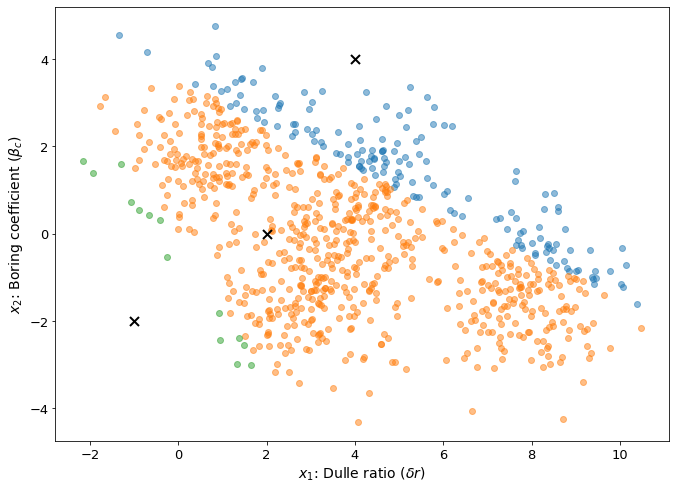

In [65]:
# YOUR CODE HERE
plt.ylabel(r'$x_2$: Boring coefficient $(\beta_{c})$')
plt.xlabel(r'$x_1$: Dulle ratio $(\delta{r})$')
plt.plot(initial_centroids[:,0], initial_centroids[:,1], 'xk',ms=9, mew=2)
for j in range(K):
    #x = [ac[j,0] for ac in initial_centroids]
    #y = [ac[j,1] for ac in initial_centroids]
    #plt.plot(x, y, 'x-', 'xk', ms=7, mew=2)
    ind = cIndex == j
    plt.scatter(data[ind[:],0], data[ind[:],1], alpha = 0.5)
#raise NotImplementedError()

## Step 2. Implement `computeCentroids(X, cIndex, K)`

Consider the following template. To finish this function, you will need to compute the values of three local variables in the body of the function:

    centroids
    indx 
    centroids[k,:] 
    
The variable `centroids` is initialized to a 2-dimensional array, whose shape is determined by the number of categories, $K$, and the number of features of your data set, $n$. The variable `indx` works as a Boolean mask to select exactly those elements of $X$ that are in the $k$th cluster.  For each set of elements of $X$ in the $k$th cluster that the index `indx` picks, `centroids[k,:]` updates the "location" of the centroid of $k$ to the mean average of the $x^{(i)}$ assigned to that $k$th cluster.  To compute this average, use the optional `axis` parameter for `np.mean()`. 


~~~python

def computeCentroids(X, cIndex, K):
    # computeCentroids(X, cIndex, K):
    # inputs:
    #   X        (training data)
    #   cIndex   (cluster assignments to X, computed by findNearestCentroids)
    #   K        (number of clusters)
    # output: the mean average assigned to each cluster centroid k (1 to K) by cIndex.
    
    # m training examples of 
    # n-dimensional features
    m, n = X.shape
    
    # initialize centroids to zeros.
    centroids = ---
    
    # update the "location" of each centroid
    # by calculating the mean average of the 
    # elements of training set assigned to 
    # cluster k, for every k in K
    for k in range(K):
        
        # indx is an array of Boolean values to filter 
        # the training set by each cluster
        indx = k == ---
        
        # calculate the average mean value
        # of those elements of X assigned to
        # cluster k by cIndex
        centroids[k,:] = ---
    
    return centroids

~~~
Your implementation of `computeCentroids()` should work for any `X`, `cIndex`, and `K`, not only the specific parameters for the Dulle and Boring example.

In [67]:
def computeCentroids(X, cIndex, K):
    # computeCentroids(-1-, -2-, -3-):
    # inputs:
    #   -1-      an np.array, representing the training data 
    #   -2-      an np.array, the output of the function findNearestCentroid()
    #   -3-      an integer, representing the number of clusters
    # output: 
    #  centroids: an np.array, stores the mean average assigned to each cluster centroid k (1 to K) by cIndex.
    
    m, n = X.shape
    # initialize centroids to zeros.
    centroids = np.zeros((K,n))

    # update the "location" of each centroid
    # by calculating the mean average of the 
    # elements of training set assigned to 
    # cluster k, for every k in K
    for k in range(K):

        # indx is an array of Boolean values to filter 
        # the training set by each cluster
        indx = k == cIndex

        # calculate the average mean value
        # of those elements of X assigned to
        # cluster k by cIndex
        centroids[k,:] = np.mean(X[indx],axis=0)

    # YOUR CODE HERE
    #raise NotImplementedError()
    return centroids

In [68]:
# test cell

# test_c_labels is an array of cluster labels for `data` for K = 3
test_c_labels = np.array([2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2,
       0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2,
       0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2,
       0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2,
       0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
       1, 1, 0, 0, 0, 1, 0])

# test_mu calls your implementation of computeCentroids
# with input `data`, `test_c_labels`, and K = 3, and
# rounds the result to 8 decimal places
test_mu = np.round(computeCentroids(data, test_c_labels, 3), 8)

# the next block tests your test_mu.
if np.array_equal(test_mu, np.array([[ 4.03999805,  0.1432664 ],[ 3.88633842,  0.03617118],[ 4.13822918, -0.05724392]])):
    assert True
else:
    print("Your computeCentroids() called on test_c_labels and K = 3 returns\nthe value", test_mu)
    print("which is incorrect.")
    raise AssertionError
                          

In [ ]:
# computeCentroids Test cell 2

# III. Run K-means on Dulle & Boring
Now we are ready to assemble the pieces of code that you've written to run K-means.  What this next block of code does is to execute the first loop and second loop, repeatedly.  

There is also an option, `plot_on`, which takes the Boolean values `True` or `False` to turn on or off, respectively, a plotting function.  Setting `plot_on = True` produces a plot of the path each centroid takes its initial position to its final position through all `max_iters` number of iterations executed by `kMeans`. While you are debugging the main part of your code, `plot_on` can be set to `False`.  

<b>However, be sure `plot_on = True` before submitting your assignment</b> <b>to receive full credit</b>.

~~~python
def kMeans(X, initial_centroids, max_iters, plot_on = True):
    """kMeans algorithm with plotting function
    
    PARAMETERS:         np.array
    :X:   np.array
        An unlabeled data set stored as an np array.
    :initial_centroids: np.array
        An np array of centroid locations
    :max_iters:         int
        The number of iterations kMeans runs
    :plot_on:           bool
        Turns on (=True) or off (=False) a plot of the 
        path traveled by the centroids.  
         NOTE: the plotting function assumes centroids 
               are in R^2.   
    """

    # YOUR CODE:
    # set m and n from dimensions of X
    m, n = ---
    
    # set K from initial_centroids
    K = ---
    
    # initialize cIndex to vector of zeros
    cIndex = ---
    
    # centroids initialized by initial_centroids
    centroids = initial_centroids
    
    # initialized empty list for all centroids
    all_centroids = []
    
    # add the initial centroids, formatted as an array, to
    # the list of all_centroids for a complete path to plot
    all_centroids.append(np.asarray(initial_centroids))
    
    # for loop for max iterations, to 
    # determine how many iterations K-means will run
    for ii in range(max_iters):
        
        cIndex = ---
        centroids = ---
        all_centroids.append(centroids)
            
            
    # option for plotting the path the centroids take
    # as the algorithm runs
    if plot_on:       
        
        # plot progress of centroid movement
        for j in range(K):
            x = [ac[j,0] for ac in all_centroids]
            y = [ac[j,1] for ac in all_centroids]
            plt.plot(x, y, 'x-', color='k', ms=7, mew=2)
        
        # plot final classification of x^(i)
        for -- in range(--):
            ---
            ---                 # check that you are not 
                                # referring to a global variable
                                # pay attention to indentation for each for loop
          
    return centroids, cIndex

~~~

If implemented correctly, running `kMeans(data, initial_centroids, 10)` will produce a plot that resembles the following: 

<img src="ps5-fig03.png" alt="ps5-fig03.png" width="550"/>

Note that we deliberately omitted the axis labels. As before, we let matplotlib determine the colors of the clusters automatically. 

Your code should run for <b>any</b> data set, initialized centroids, and maximum number of iterations, and not only for the parameters specific to the Dulle and Boring example.

In [69]:
def kMeans(X, initial_centroids, max_iters, plot_on = True):
    """kMeans algorithm with plotting function
    
    PARAMETERS:         np.array
    :X:   np.array
        An unlabeled data set stored as an np array.
    :initial_centroids: np.array
        An np array of centroid locations
    :max_iters:         int
        The number of iterations kMeans runs
    :plot_on:           bool
        Turns on (=True) or off (=False) a plot of the 
        path traveled by the centroids.  
         NOTE: the plotting function assumes centroids 
               are in R^2.   
    """
    # YOUR CODE:
    # set m and n from dimensions of X
    m, n = X.shape

    # set K from initial_centroids
    K = len(initial_centroids)

    # initialize cIndex to vector of zeros
    cIndex = np.zeros((m,1))

    # centroids initialized by initial_centroids
    centroids = initial_centroids

    # initialized empty list for all centroids
    all_centroids = []

    # add the initial centroids, formatted as an array, to
    # the list of all_centroids for a complete path to plot
    all_centroids.append(np.asarray(initial_centroids))

    # for loop for max iterations, to 
    # determine how many iterations K-means will run
    for ii in range(max_iters):

        cIndex = findNearestCentroid(X, centroids)
        centroids = computeCentroids(X, cIndex, K)
        all_centroids.append(centroids)


    # option for plotting the path the centroids take
    # as the algorithm runs
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    # option for plotting the path the centroids take
    # as the algorithm runs
    if plot_on:       # plot progress
        for j in range(K):
            x = [ac[j,0] for ac in all_centroids]
            y = [ac[j,1] for ac in all_centroids]
            plt.plot(x, y, 'x-', color='k', ms=7, mew=2)
            
        for k in range(K):
            ind = cIndex == k
            plt.scatter(X[ind[:],0], X[ind[:],1], alpha = 0.5)
    return centroids, cIndex


(array([[ 7.88055136, -1.27083262],
        [ 3.61099767, -0.3404891 ],
        [ 0.91144482,  1.95587908]]),
 array([1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2,
        1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2,
        1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2,
        1, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1,
        0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0,
        0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1,
        2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2,
        0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1,
        0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1,
        1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1,
  

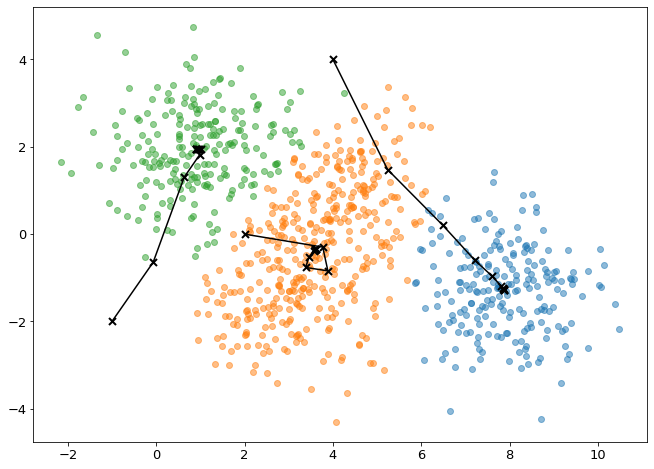

In [35]:
kMeans(data, initial_centroids, 10)

The next test cell tests your implementation of kMeans (up to two decimal places).  You should not round your output, however, as hidden test cells will test your output `centroids` with a higher degree of precision. 

In [70]:
# test cell
# This cell compares the output of your implementation of 
# kMeans to the approximately correct location of centroids (i.e., to 2 decimal places)
test_centroids = np.round(kMeans(data, initial_centroids, 10, plot_on = False)[0], 2)
assert np.array_equal(test_centroids, np.array([[ 7.88, -1.27], [ 3.61, -0.34],[ 0.91,  1.96]]))


In [71]:
# test cell -- PUBLIC

# This cell returns the correct labels (either 1, 2, or 3) from the 
test_cIndex = np.round(kMeans(data, initial_centroids, 10, plot_on = False)[1],1)
correct_cIndex = np.array([1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2,
        1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2,
        1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2,
        1, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1,
        0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0,
        0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1,
        2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2,
        0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1,
        0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1,
        1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1,
        0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 0, 2,
        1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0,
        1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0,
        1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1,
        1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2,
        2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2,
        0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1,
        1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0,
        1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1,
        1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2,
        2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
        2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1,
        1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2,
        1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2,
        0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1,
        2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2,
        0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1,
        1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0,
        0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1,
        1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0,
        1, 1, 1, 0, 2, 1, 0])
assert np.array_equal(test_cIndex, correct_cIndex)

In [ ]:
#test cell


In [ ]:
# test cell


## Randomly initializing the centroids

So far, you have written the code for the internal two loops of the K-means algorithm, `findNearestCentroid()` and `computeCentroids()`, and put these pieces together into a basic version of the K-means algorithm.  You have also added a print routine to plot the path taken by each of the centroids.  Well done!

However, there is one piece missing. The very first step calls for the <b>random initialization</b> of the $K$ cluster centroids:

<img src="ps5-fig05.png" alt="ps5-fig05.png" align="left" width="490"/>

So, instead of manually selected three initial locations for `initial_clusters` in our Dulle and Boring example, as we did above, to complete your K-means algorithm, you should use the following block of code to randomly initialize the centroids:

~~~python

def initializeCentroids(X, K):
    # Inputs:
    #   X - training data
    #   K - number of clusters
    # Outputs:
    #   an array for a random initial position
    #   of the K centroids in n-dimensions
    
    init_centroids = np.random.permutation(X.shape[0])
    
    return X[init_centroids[:K], :]

~~~
You should nevertheless study this code to understand what it is doing.

In [72]:
def initializeCentroids(X, K):
    # Inputs:
    #   X - training data
    #   K - number of clusters
    # Outputs:
    #   an array for a random initial position
    #   of the K centroids in n-dimensions
    init_centroids = np.random.permutation(X.shape[0])

    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return X[init_centroids[:K], :]

You now have finished all of the pieces of the K-means algorithm

---

# IV. Image compression with K-means

We used the Dulle and Boring example to help illustrate how the K-means algorithm works to cluster 2-dimensional data with three clearly separated clusters in the data.  The output of K-means in the Dulle and Boring example is the locations in $\mathbb{R}^2$ of the "stable" locations of the centroids, and onemay view these stable locations as giving a kind of summary of the entire data set.  If all that you knew about the Dulle and Boring data set where those three centroid locations, you would have some (albeit, rough) idea that the data was arranged in some manner around those three locations.   Even though we lose a lot of information going from 843 data points down to 3, perhaps enough information is preserved to warrant the advantages gained by this drastic reduction in dimensions.  What we are describing is the use of K-means for <b>dimension reduction</b> of data.

One application of dimension reduction that is a bit more complicated is <b>image compression</b>, and one type of image compression problem involves taking a color photograph and drastically reducing the number of colors used to render the image.  You might be surprised to learn that your K-means algorithm can be used for precisely this task!  

Let's have a look.  

Below is a 450 x 450 color pixel image:


<img src="bird.png" alt="bird image" width="350"/>


The next steps walk you through how to transform the `.tiff` image file, `bird.tiff`, into a NumPy array to feed into your K-means algorithm. 


<div class="alert alert-block alert-info">
As I hope is clear by now, image problems offer useful examples involving high-dimensional data.  A difficult step in working directly with financial data sets of comparable complexity, or other kinds of higher-dimensional data sets, is the lack of a clear and intuitive way to visualize that complexity. Coming up with a sensible way to interpret the data, which often involves devising a scheme for visualization, is a skill (and course) on its own.  Working with images spares us from this difficulty, providing a non-trivial high-dimension data set that nevertheless yields natural and intuitive visualizations.  This allows us then to focus on the workings of the learning algorithms.
</div>

## Import a .tiff file

The first step is to load `bird.tiff`.

~~~Python
A = plt.imread('bird.tiff')
~~~
You can check the type and shape of `A`.  Note that the color encoding uses the [CMYK color model](https://en.wikipedia.org/wiki/CMYK_color_model), instead of RGB, so the dimension is $(m \times n \times 4)$ rather than m by n by 3. You can check the shape of `A`, recall, with `A.shape`.  So, whereas Dulle and Boring was a 2-dimensional data set, this tiger image is a 4-dimensional data set.


In [100]:
A = plt.imread('bird.tiff')

Next, we plot the image directly from the NumPy array representation.

~~~Python
plt.imshow(A, extent=[0, 1, 0, 1])
~~~

Although you may see some loss in image quality if you look closely, your `plt.imshow` representation should be close to the original.

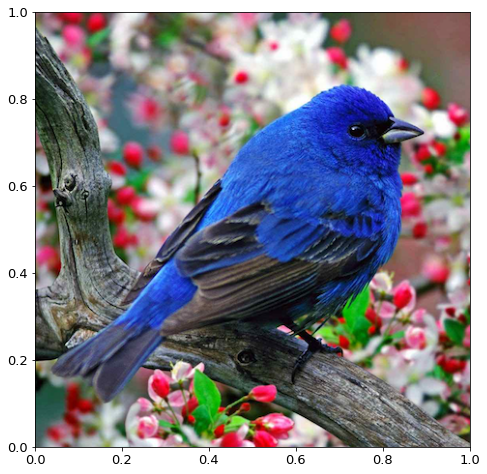

In [101]:

plt.imshow(A, extent=[0, 1, 0, 1])

The next step is to scale your features. You will rescale your features by dividing each pixel color encoding in $A$ by 255, that is:

~~~Python
A = A / 255
~~~


In [102]:
A = A / 255

Next, using `np.reshape`, we unroll our rescalled `A` to a 202500 x 4 array, `Bird` 

~~~Python
Bird = np.reshape(A, (A.shape[0]*A.shape[1],4))
~~~
`Bird` represents 202,500 points in $\mathbb{R}^4$.  This 202500 x 4 array is the form of the data that you will pass to K-means.

In [103]:
Bird = np.reshape(A, (A.shape[0]*A.shape[1],4))

Now you are ready to run K-means as an image compression tool.  The next function, `kCompress`, takes an np.array representation of a tiff image `X`, an integer `K` for the number of classes, an integer `max_iters`, and the default plot setting `plot_on = True`, and returns `centroids` and the `cIndex`:

~~~python

def kCompress(X, K, max_iters, plot_on=True): 
    
    # YOUR CODE HERE
    initial_centroids = ---
    ---
    return centroids, cIndex

~~~

The local variable `initial_centroids` should be randomly assigned, and your model passed to the graders should have 15 centroids and run for 100 iterations.

Then, call `kCompress` and save the outputs to the variables `centroids` and `cIndex`:

~~~ python

centroids, cIndex = kCompress(---,---,---,plot=True)
~~~

where the first three arguments need to be changed to correct parameter values.
<div class="alert alert-block alert-info">
You are encouraged to vary these parameters to see the effect on your model. However, you <b>must</b> submit your notebook using the parameters in the instructions to receive full credit.
</div>

In [108]:
def kCompress(X, K, max_iters, plot_on=True):
    
    # YOUR CODE HERE
    initial_centroids = initializeCentroids(X, K)
    centroids, cIndex = kMeans(X, initial_centroids, max_iters, plot_on = True)
    #raise NotImplementedError()
    
    return centroids, cIndex


# Chance the parameters from None to
# the correct values T
X = Bird         # array
K = 15         # int
max_iters = 100 # int


### Important!

Note the three lines above, after `kCompress`():
~~~python

# Chance the parameters from None to
# the correct values T
X = None         # array
K = None         # int
max_iters = None # int

~~~

You must change the parameters to admissible values to pass the next test cell.

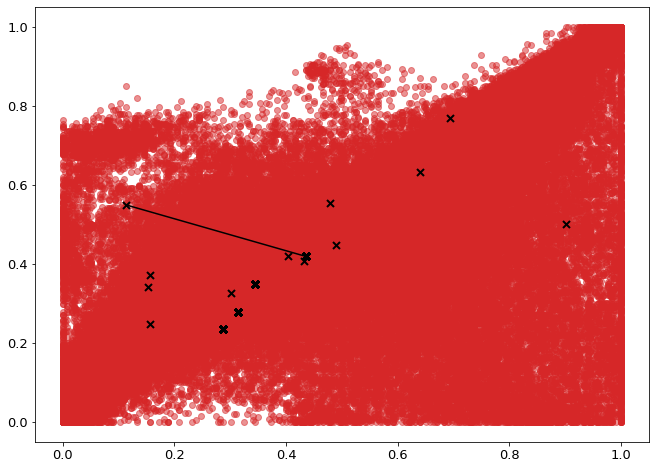

In [109]:
#test

centroids, cIndex = kCompress(X, K, max_iters, plot_on=True)

Next, you will map each pixel to its centroid value and reshape the recovered images into a 285 x 285 x 4 numpy array. This code is provided for you.

~~~python

# map each pixex to its centroid value
Bird_recovered = centroids[cIndex,:]

# reshape
Bird_recovered = np.reshape(Tiger_recovered, (A.shape[0], A.shape[1], 4))
~~~

In [110]:
Bird_recovered = centroids[cIndex,:]

# reshape
Bird_recovered = np.reshape(Bird_recovered, (A.shape[0], A.shape[1], 4))

Lastly, you will compare the original image (on the left) to the recovered compressed image created by kMeans (on the right), which uses only 15 colors.

Text(0.5, 1.0, 'Compressed')

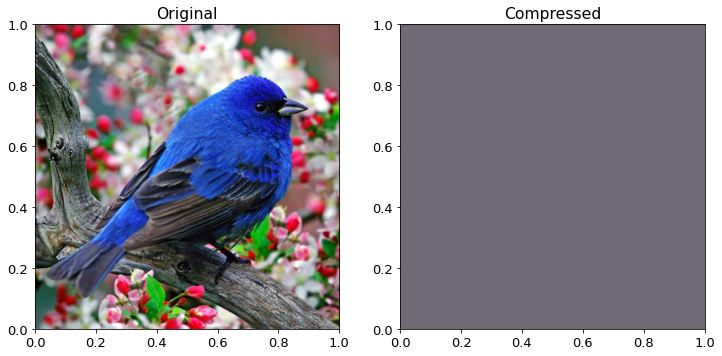

In [111]:
# Side-by-side Comparison plot
fig = plt.figure(figsize=(12,6))

# Original image
ax1 = fig.add_subplot(121)
ax1.imshow(A, extent=[0, 1, 0, 1])
ax1.set_title('Original')

# Recovered image (compressed by k-Means)
ax2 = fig.add_subplot(122)
ax2.imshow(Bird_recovered, extent=[0, 1, 0, 1])
ax2.set_title('Compressed')

# V. PCA and Sorting Books by Color

Another important unsupervised learning technique is <b>principal component analysis</b>, or PCA.  PCA is a statistical technique (Pearson 1901) for grouping together observations in a data set into correlated "components", where the group of components are linearly uncorrelated with one another and ordered by how much of the variability in the data each component can account for.  So, the first component accounts for most of the variability; the second component accounts for most of the variability left over from the first, et cetera. Put a bit more carefully, PCA is a linear transformation of a data set into some coordinate system whereby the first (or principal) component of that system has the property that the greatest variance of the data lies in this first component, the second greatest variance lies on the second component, the third greatest variance lies in the third component, et cetera.  

More can (and should) be said about PCA, but one thing to emphasize is that PCA is sensitive to the scaling of your data. 
For more, you will either have to wait until Machine Learning II or start digging into [Jolliffe (2002)](http://cda.psych.uiuc.edu/statistical_learning_course/Jolliffe%20I.%20Principal%20Component%20Analysis%20(2ed.,%20Springer,%202002)(518s)_MVsa_.pdf).  For this assignment, this brief description will suffice.

---

Suppose there are a lot of books to organize. Your books, your friend's books, your parents' books: somebody in your life doubtless has a lot of books.  And let's suppose this person would like to sort these books by the _colors_ of their bindings, as the art and design website [dornob](https://dornob.com/organize-sort-shelve-books-by-color/) recommends for those who find organizing books by topic, title or author passé.

<img src="color-books.png" alt="color books" width="750"/>


How might we achieve the same effect <i>digitally</i> without touching a book?  If we set aside the image segmentation problem, the sorting of colors can be done with PCA.


## Your data set
The next cell loads 50 RBG colored patches from a csv file, stored as a (50, 3) np array called `books`, and prints your "book shelf" of randomly ordered (by color) books.

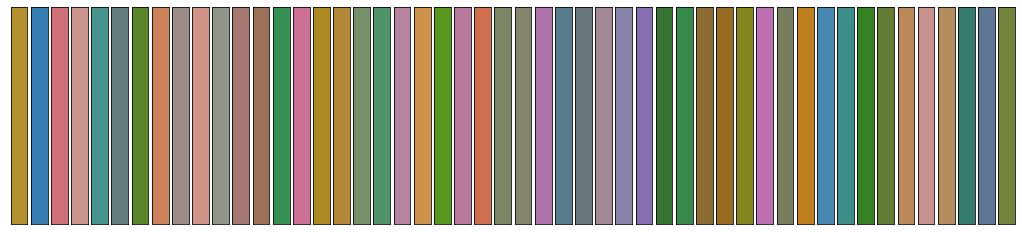

There are 50 colors.


In [36]:
# change the size of the plot
rcParams['figure.figsize'] = 18, 4 
books = np.genfromtxt('books.csv', delimiter=',')

def display_bookshelf(books):
    #figsize(13,2)
    num = books.shape[0] # returns number of books in array
    for i,c in enumerate(books):
        ax = plt.subplot(1,num,(i+1), facecolor=c)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.show()
display_bookshelf(books)
print("There are {0} colors.".format(books.shape[0]))  

## Your task
Your task is to order the books by the <b>first principal component</b> of `books`. Specifically, from sklearn's PCA implementation, you will build a PCA model with exactly 1 component and use that single component to reorder your book shelf.

~~~python
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
~~~

The result should look like the following:

<img src="ps5-fig07.png" alt="color books" width="1000"/>

and there are specific values in the public test cells, below, to guide you.



In [37]:
from sklearn.decomposition import PCA

def book_sort(books):
    """A function to sort an np array by its first PCA component 
    
    :books:  numpy.ndarray
        the variable books stores a (m x 3) np array of RGB colors
        for m "books"
    
    OUTPUT
    :books_sorted:  numpy.ndarray
        the function returns the np array books sorted by
        its first principal component
    """
    pca = PCA(n_components=1)
    books_sorted = pca.fit_transform(books)
    books_sorted = books[np.argsort(books_sorted[:, 0]), :]

    # Transform the dataset to its new basis
    #books_sorted = pca.transform(books)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return books_sorted

In [38]:
# test cell
# public test for the 5th book and 17th book sorted by color and all 50 books are sorted
your_sort = book_sort(books)
if np.allclose(your_sort[4],[0.73846898, 0.44096061, 0.69631569]) and np.allclose(your_sort[16],[0.64640196, 0.4727018 , 0.44472728]) and len(books) ==50:
    assert True
else:
    raise AssertionError("Your book shelf is not correctly sorted by the 1st principal component of the array :books:.")
    



## Discussion

You will notice that the sort of your "book shelf" is not perfect, and the reason is that only the first principal component is used to sort the colors.  There is a lesson in this observation.  The components of PCA are constructed on a different coordinate system than the original RBG color encoding, and we are only using <i>the first</i> component.  As a result, colors that are "close together" in RBG space (i.e., that look similar to us) are not always close together in the first component of the PCA analysis.  In general, you should not think of principal components as faithfully capturing natural categories in the original problem space.  Nevertheless, the first component does a reasonably good job.

---
## Extra Credit: Can you do better? (2 points)

Sorting these 50 books by the first principal component leaves several colors obviously out of sequence.  For example, the sort would be improved by moving the 2nd, 4th, and 6th books all to the left into positions 1, 2, and 3.  And there are others. 

Using PCA or kMeans, can you generate a sort of books without any obvious out of sequence colors?  Yes, "obvious" is subjective: this is extra credit and I am the judge.  Nevertheless, here are the rough guidelines I will use to judge results:

- 0 points: no improvement or an improvement but produced (a) without code or (b) by methods other than PCA and kMeans or (c) by hand-coding an "eyeball" sort, insofar as this is distinguishable from (a).
- 1 point: discernible improvement (original sort results plus ~ 1/2 of the out of sequence colors moved into  correct position)
- 2 points: correctly sorted without any color obviously out of order.

To be clear, the objective is to use the two methods in this exercise to get a better sort. The objective is <b>not</b> to get a better sort by any method you choose.  

How you levereage PCA and kMeans is your choice.  If you have questions, please ask.

Good luck!

In [39]:
def better_book_sort(books):
    """A function to sort an np array 
    
    :books:  numpy.ndarray
        the variable books stores a (m x 3) np array of RGB colors
        for m "books"
    
    OUTPUT
    :books_sorted:  numpy.ndarray
        the function returns the np array books sorted by color
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    return books_sorted

In the next <b>manually graded cell</b>, execute your `better_book_sort()` function and use `display_bookshelf()` to display your results.  To be considered, <b>it is necessary that you complete two steps</b>:

### 1) Complete `better_book_sort()` using either PCA or Kmeans (or both methods)

You should use the following template:

~~~python

def better_book_sort(books):
    """A function to sort an np array 
    
    :books:  numpy.ndarray
        the variable books stores a (m x 3) np array of RGB colors
        for m "books"
    
    OUTPUT
    :books_sorted:  numpy.ndarray
        the function returns the np array books sorted by color
    """
    books_sorted = # YOUR LINES OF CODE
        >...
        >...
        >...
 
    return books_sorted

~~~

You may use your Kmeans implementation or PCA or both only;  you may not use any other methods.

### 2) Plot with `display_bookshelf()`

You must produce a plot of your results using the function `display_bookshelf()`, above.

Use the next graded cell to enter your answer.

In [92]:
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# Test for Collaborator policy before submission
%run -i 'collaboration_test.py'

Before submitting this notebook, you should do the following steps:

<div class="alert alert-block alert-danger">
    0. <b>Delete Any New Code You Introduced</b>: Remove all extraneous print statements and all new substantive code blocks introduced by you.  What's substantive?  If you see: $$\mathtt{In}\ [ * ]:$$ next to a cell you added for more than a few seconds, remove it.
</div>

  1. __Restart Kernel__ (Kernel ⟶ Restart and Clear Output)
  2. __Run all Cells__ (Cell ⟶ Run All)
  3. __Validate__: Press the 'Validate' button above.
  4. __Save File__ (File ⟶ Save and Checkpoint)
  5. __Close and Shutdown Kernel__ (File ⟶ Close and Halt)
